<a href="https://colab.research.google.com/github/het2004/heartdiseaseprediction/blob/main/heartdiseaseprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn

Importing All Labriaries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate,  cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import time
from time import time
from sklearn.metrics import roc_auc_score, make_scorer
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Renaming Columns

In [ ]:
df.columns = ['Age', 'Sex', 'CheastPainType', 'RestingBP', 'Cholesterol', 'FBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'NumMajorVessels', 'Thal', 'Target' ]

In [ ]:
df.head(3)

,Age,Sex,CheastPainType,RestingBP,Cholesterol,FBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,NumMajorVessels,Thal,Target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


In [ ]:
# Shape of dataset
df.shape

(1025, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              1025 non-null   int64  
 1   Sex              1025 non-null   int64  
 2   CheastPainType   1025 non-null   int64  
 3   RestingBP        1025 non-null   int64  
 4   Cholesterol      1025 non-null   int64  
 5   FBS              1025 non-null   int64  
 6   RestingECG       1025 non-null   int64  
 7   MaxHR            1025 non-null   int64  
 8   ExerciseAngina   1025 non-null   int64  
 9   Oldpeak          1025 non-null   float64
 10  ST_Slope         1025 non-null   int64  
 11  NumMajorVessels  1025 non-null   int64  
 12  Thal             1025 non-null   int64  
 13  Target           1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.duplicated().sum()

np.int64(723)

In [ ]:
df.drop_duplicates(inplace = True)
df

,Age,Sex,CheastPainType,RestingBP,Cholesterol,FBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,NumMajorVessels,Thal,Target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              302 non-null    int64  
 1   Sex              302 non-null    int64  
 2   CheastPainType   302 non-null    int64  
 3   RestingBP        302 non-null    int64  
 4   Cholesterol      302 non-null    int64  
 5   FBS              302 non-null    int64  
 6   RestingECG       302 non-null    int64  
 7   MaxHR            302 non-null    int64  
 8   ExerciseAngina   302 non-null    int64  
 9   Oldpeak          302 non-null    float64
 10  ST_Slope         302 non-null    int64  
 11  NumMajorVessels  302 non-null    int64  
 12  Thal             302 non-null    int64  
 13  Target           302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [ ]:
# Checking for missing values
df.isnull().sum()

Age                0
Sex                0
CheastPainType     0
RestingBP          0
Cholesterol        0
FBS                0
RestingECG         0
MaxHR              0
ExerciseAngina     0
Oldpeak            0
ST_Slope           0
NumMajorVessels    0
Thal               0
Target             0
dtype: int64

In [ ]:
# Describe use for count,mean,std,mini,max,and specific percentiles (25%, 50%, and 75%) of the numeric columns in a DataFrame.
df.describe()

,Age,Sex,CheastPainType,RestingBP,Cholesterol,FBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,NumMajorVessels,Thal,Target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

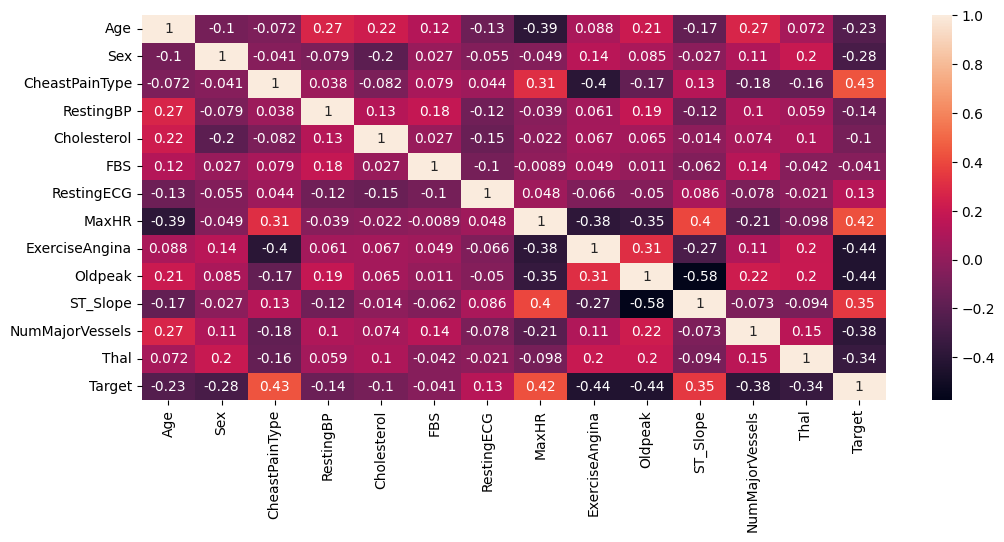

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True)

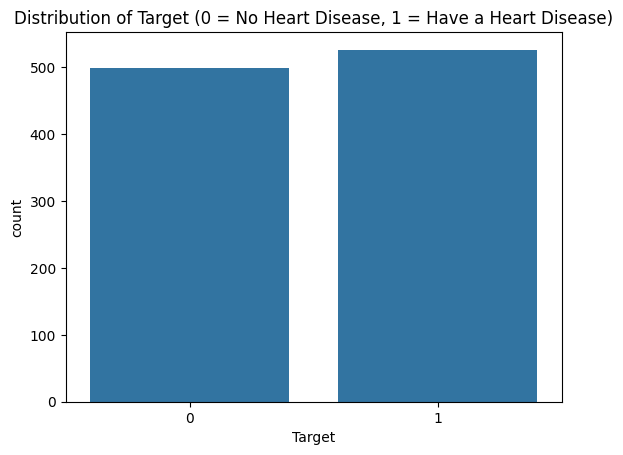

Patience without heart problems:  499
Patience with heart problems:  526


In [ ]:
# Plot Target variable distribution
sns.countplot(x='Target',data=df)
plt.title('Distribution of Target (0 = No Heart Disease, 1 = Have a Heart Disease)')
plt.show()

#Counting the number of patience have a disease or not
countNoDisease = len(df[df.Target == 0])
countHaveDisease = len(df[df.Target == 1])
print("Patience without heart problems: ", countNoDisease)
print("Patience with heart problems: ", countHaveDisease)


In [ ]:
df['Age'].unique()

array([52, 53, 70, 61, 62, 58, 55, 46, 54, 71, 43, 34, 51, 50, 60, 67, 45,
       63, 42, 44, 56, 57, 59, 64, 65, 41, 66, 38, 49, 48, 29, 37, 47, 68,
       76, 40, 39, 77, 69, 35, 74])

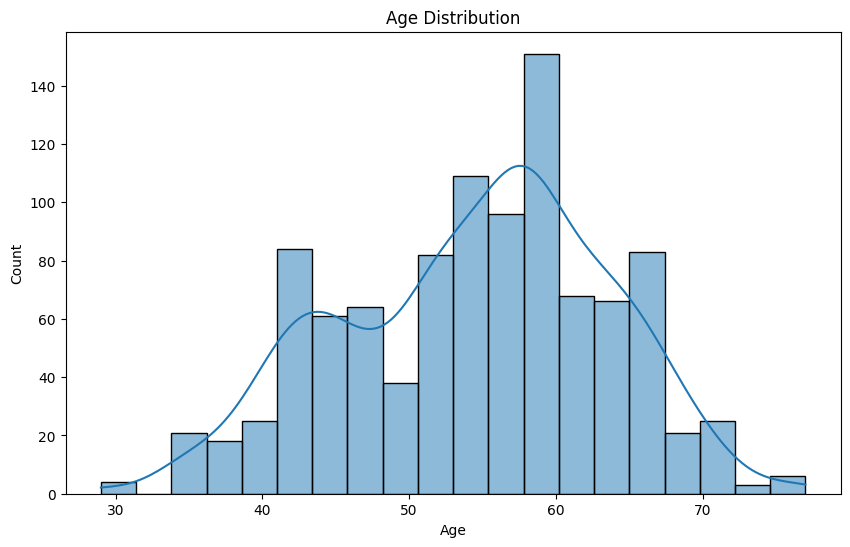

In [ ]:
# Plot distribution of Age
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

In [ ]:
df['Sex'].unique()

array([1, 0])

<Axes: xlabel='Sex', ylabel='Target'>

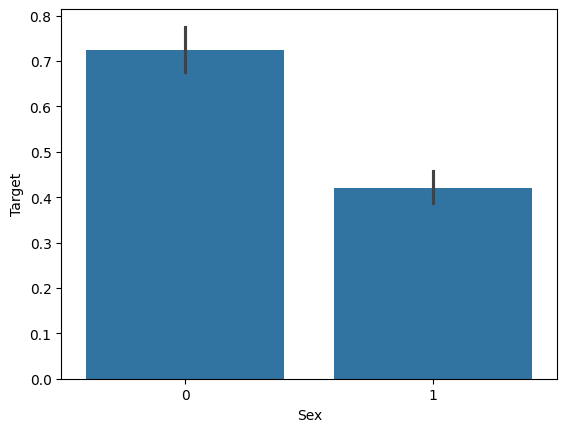

In [ ]:
y = df['Target']
sns.barplot(x=df["Sex"],y=y)

In [ ]:
df["CheastPainType"].unique()

array([0, 1, 2, 3])

<Axes: xlabel='CheastPainType', ylabel='Target'>

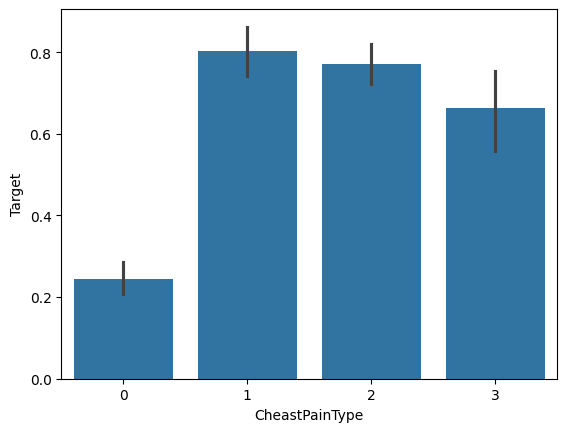

In [ ]:
sns.barplot(x=df["CheastPainType"], y=y)

In [ ]:
df['FBS'].unique()

array([0, 1])

In [ ]:
df["FBS"].describe()

count    1025.000000
mean        0.149268
std         0.356527
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: FBS, dtype: float64

<Axes: xlabel='FBS', ylabel='Target'>

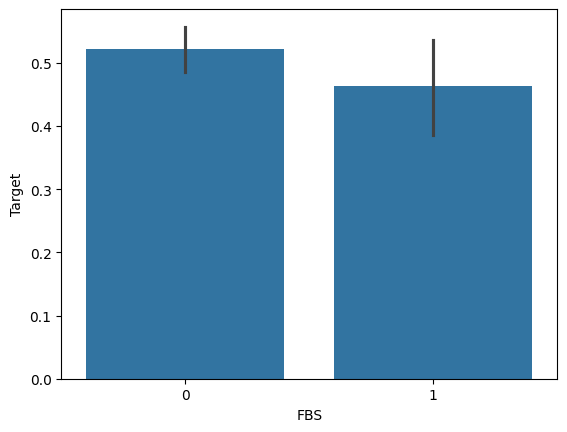

In [ ]:
sns.barplot(x=df["FBS"],y=y)

In [ ]:
df["RestingECG"].unique()

array([1, 0, 2])

<Axes: xlabel='RestingECG', ylabel='Target'>

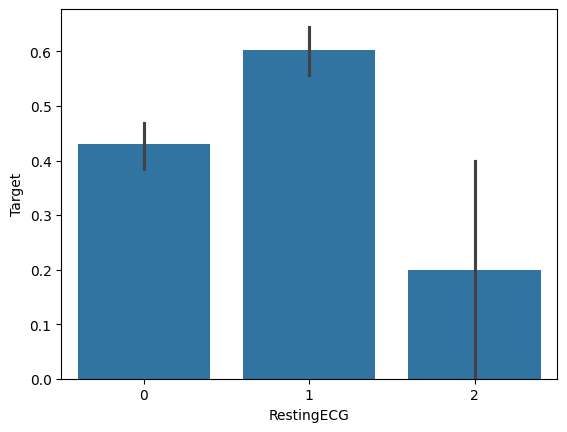

In [ ]:
sns.barplot(x=df["RestingECG"],y=y)

In [ ]:
df["ExerciseAngina"].unique()

array([0, 1])

<Axes: xlabel='ExerciseAngina', ylabel='Target'>

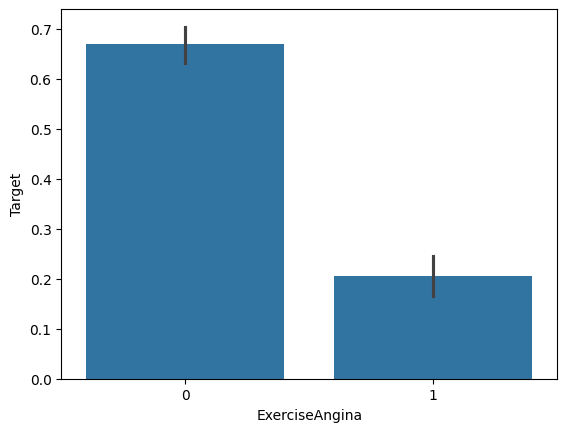

In [ ]:
sns.barplot(x=df["ExerciseAngina"],y=y)

In [ ]:
df["ST_Slope"].unique()

array([2, 0, 1])

<Axes: xlabel='ST_Slope', ylabel='Target'>

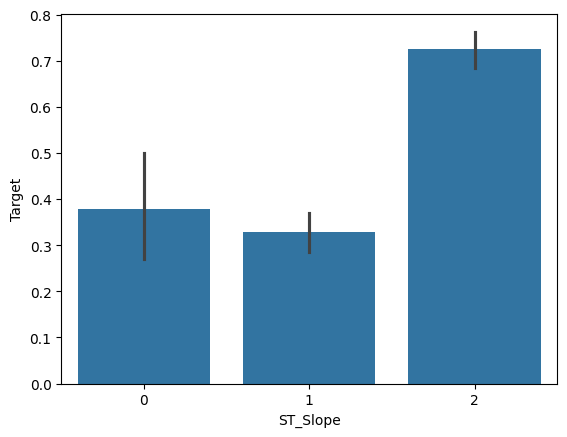

In [ ]:
sns.barplot(x=df["ST_Slope"], y=y)

In [ ]:
df["NumMajorVessels"].unique()

array([2, 0, 1, 3, 4])

<Axes: ylabel='count'>

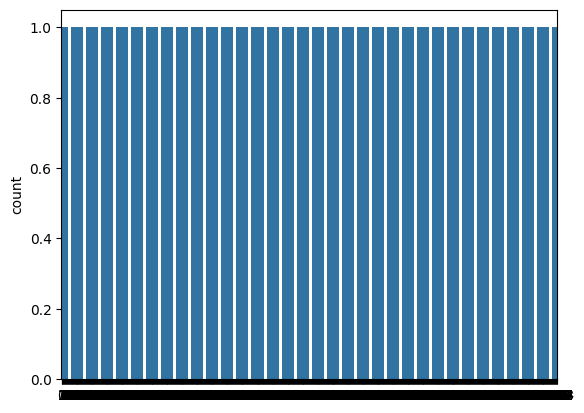

In [ ]:
sns.countplot(df["NumMajorVessels"])

<Axes: xlabel='NumMajorVessels', ylabel='Target'>

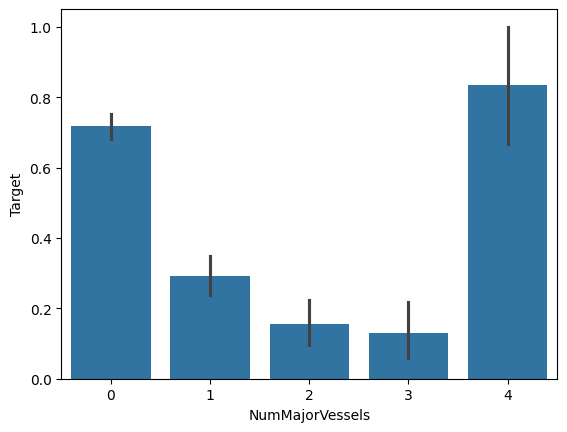

In [ ]:
sns.barplot(x=df["NumMajorVessels"], y=y)

In [ ]:
df["Thal"].unique()

array([3, 2, 1, 0])

<Axes: xlabel='Thal', ylabel='Target'>

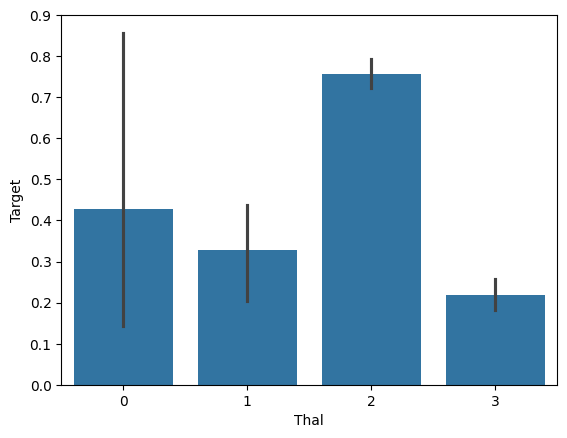

In [ ]:
sns.barplot(x=df["Thal"], y=y)

<Axes: xlabel='Thal', ylabel='Density'>

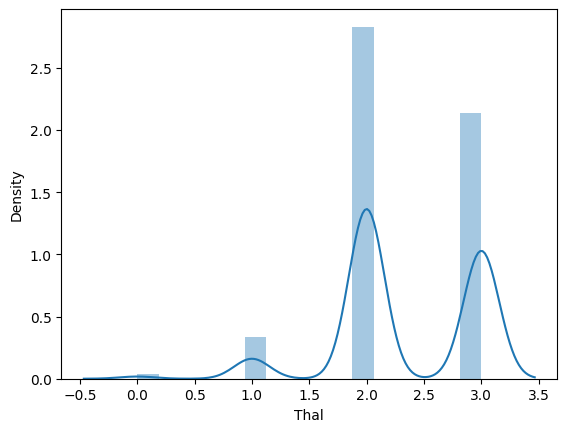

In [ ]:
sns.distplot(df["Thal"])

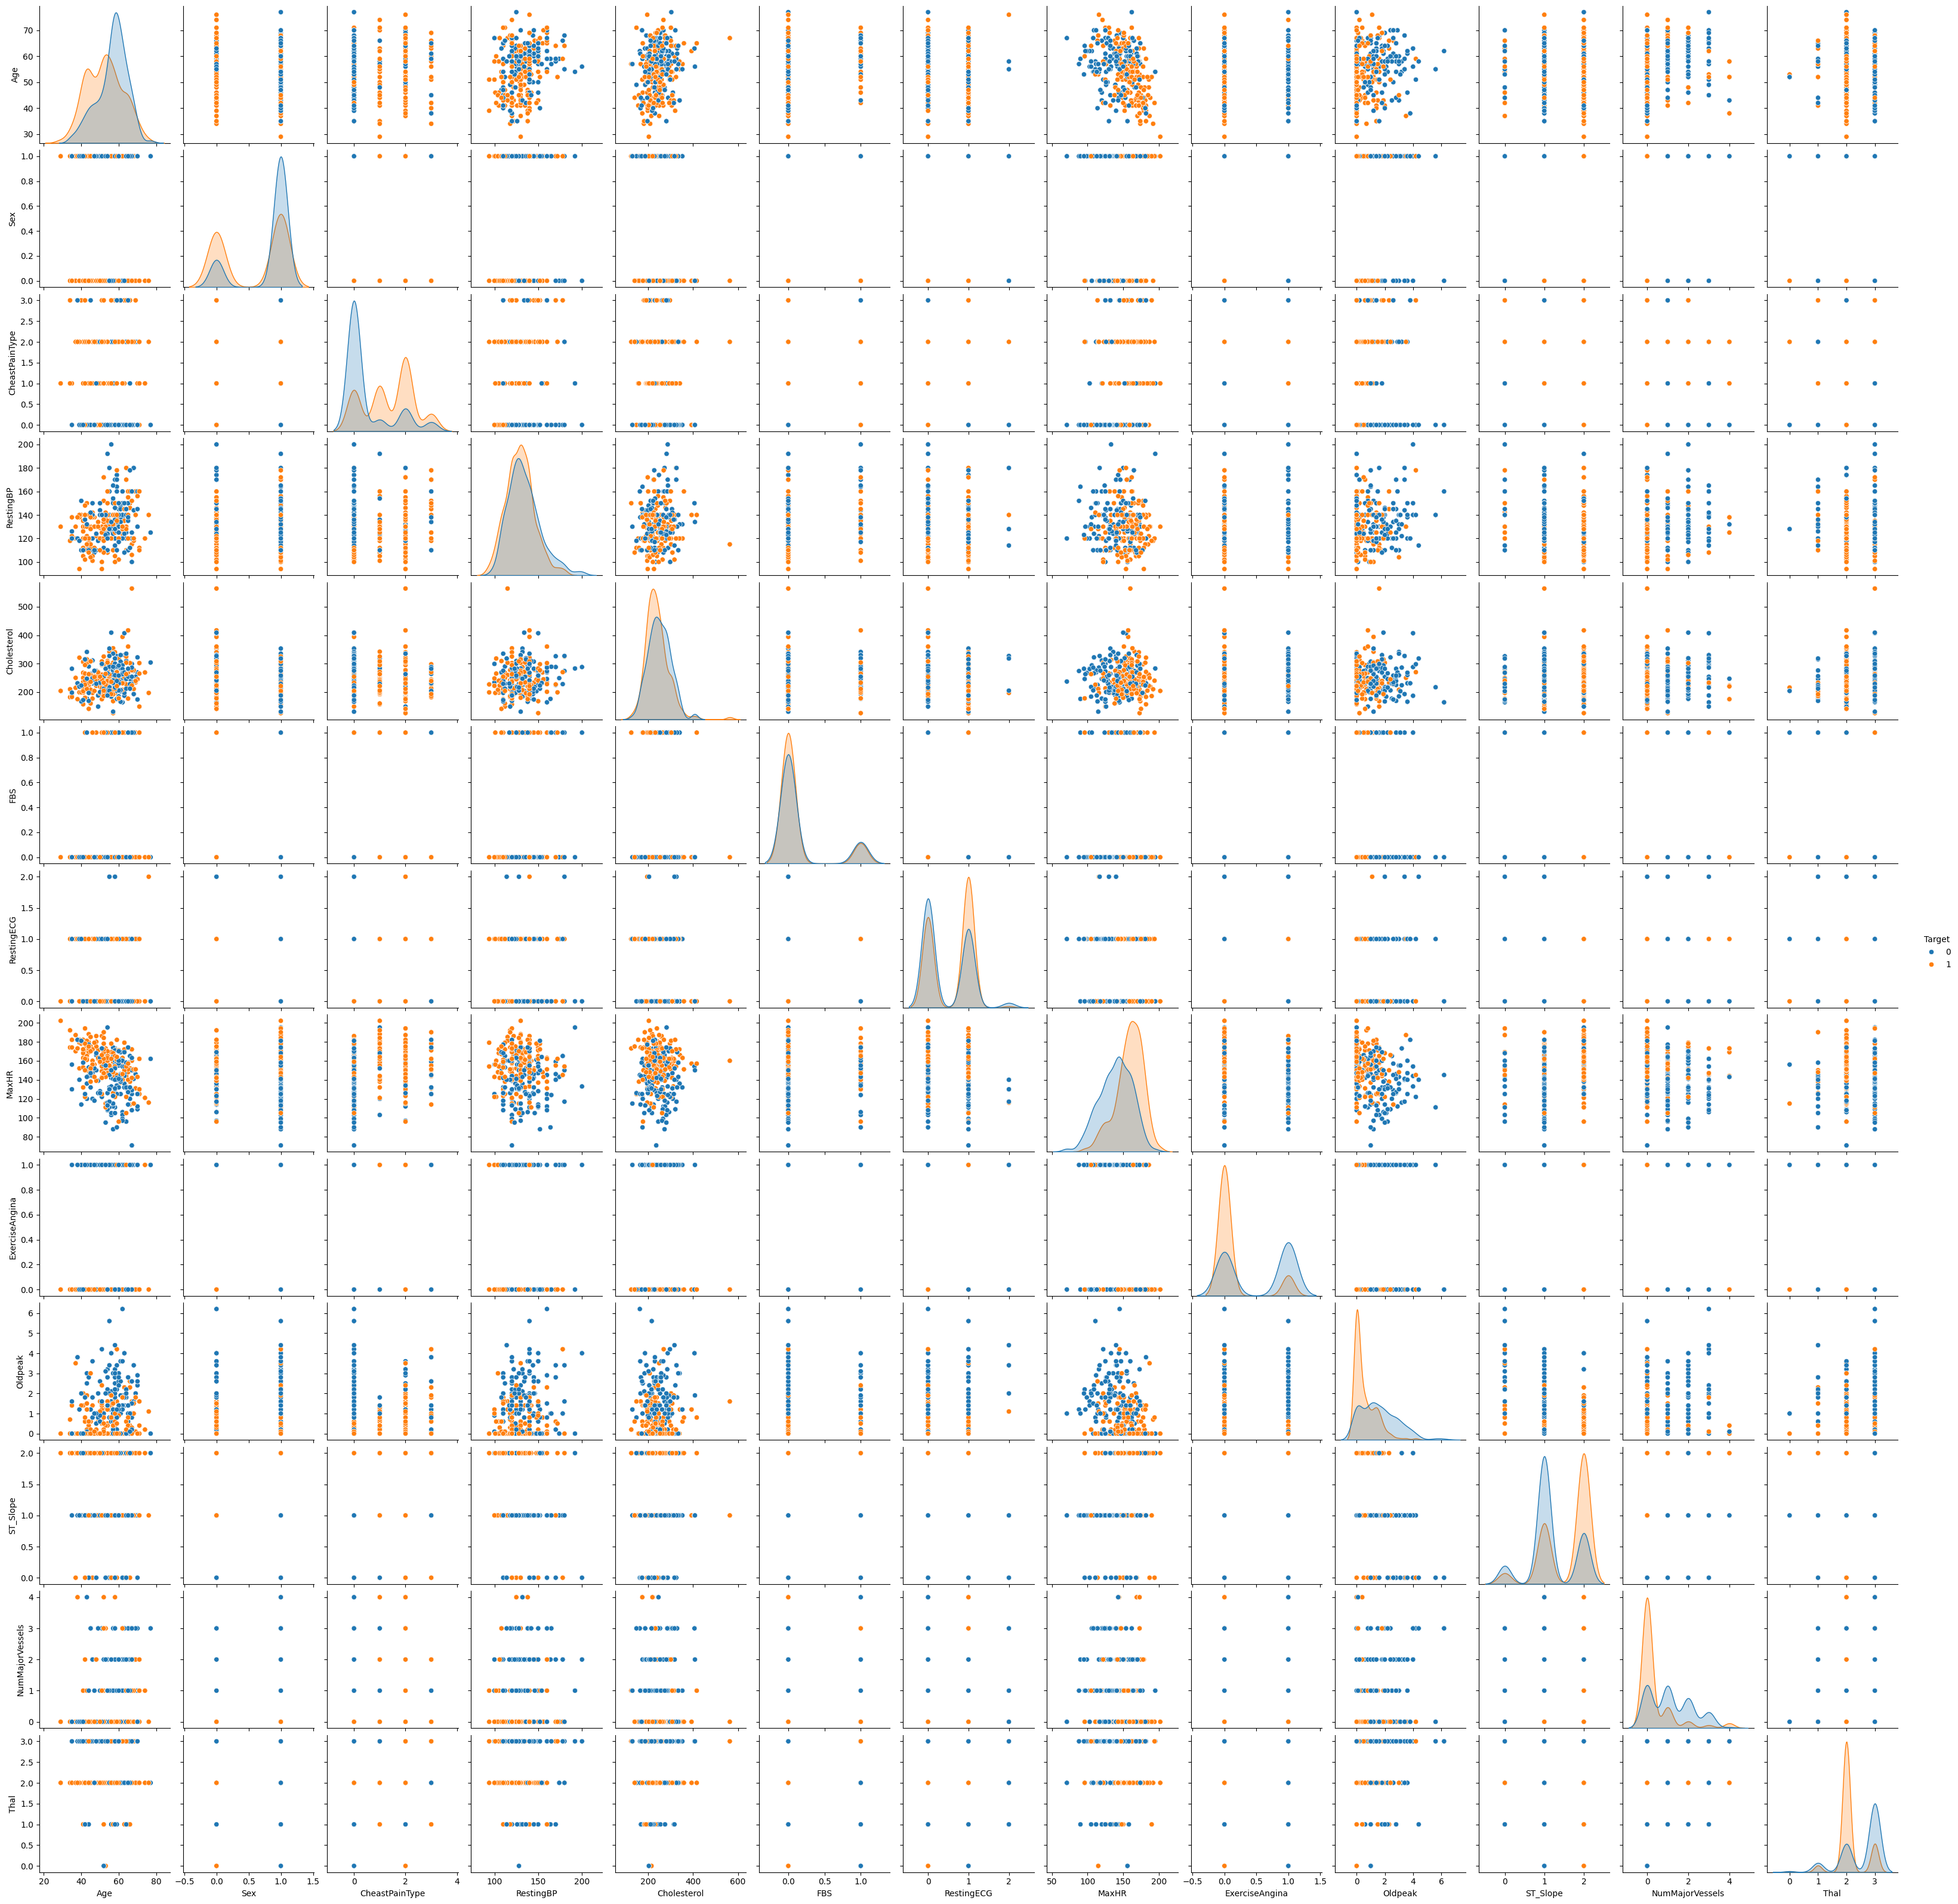

In [ ]:
# Pairplot to visualize relationships between features
sns.pairplot(df, hue='Target')
plt.show()

In [ ]:
X = df.iloc[:,:-1] # Independent Variables
y = df.iloc[:,-1] # Dependent Variables

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the feature set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred.shape

(205,)

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuarcy: {accuracy * 100:.2f}%")

Accuarcy: 79.51%


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Bagging Classifier": BaggingClassifier(),
}

In [ ]:
# Define the metrics we want to evaluate for each model
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']


In [ ]:
results = []

# Train and evaluate each model using K-fold cross-validation
for name, model in models.items():
    start_time = time() # Start the timer
    scores = cross_validate(model, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)
    end_time = time() # End the timer

    # Compute the average of each metric across the folds
    accuracy = np.mean(scores['test_accuracy'])
    precision = np.mean(scores['test_precision'])
    recall = np.mean(scores['test_recall'])
    f1 = np.mean(scores['test_f1'])
    auc = np.mean(scores['test_roc_auc'])
    elapsed_time = end_time - start_time # Time taken to run the model


    # Store the results in the list
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'AUC': auc,
        'Time (s)': elapsed_time
    })


    print(f"{name} completed in {elapsed_time:4f} seconds.")

Logistic Regression completed in 0.113297 seconds.
Random Forest completed in 1.055336 seconds.
SVM completed in 0.452266 seconds.
Decision Tree completed in 0.062959 seconds.
KNN completed in 0.153892 seconds.
Naive Bayes completed in 0.060220 seconds.
Gradient Boosting completed in 1.095996 seconds.
Bagging Classifier completed in 0.236398 seconds.


In [ ]:
# Convert results into a DataFrame for better visualization
results_df = pd.DataFrame(results)

In [ ]:
results_df

,Model,Accuracy,Precision,Recall,F1-score,AUC,Time (s)
0,Logistic Regression,0.848780,0.824850,0.900672,0.860337,0.922821,0.113297
1,Random Forest,0.980488,0.975140,0.988235,0.981291,0.996516,1.055336
2,SVM,0.919512,0.912316,0.936303,0.923314,0.966205,0.452266
3,Decision Tree,0.981707,0.981946,0.983473,0.982281,0.981689,0.062959
4,KNN,0.842683,0.835206,0.867675,0.850507,0.938750,0.153892
5,Naive Bayes,0.831707,0.820141,0.862857,0.840939,0.910822,0.060220
6,Gradient Boosting,0.956098,0.942434,0.976443,0.958540,0.984784,1.095996
7,Bagging Classifier,0.970732,0.966244,0.978796,0.971994,0.989980,0.236398


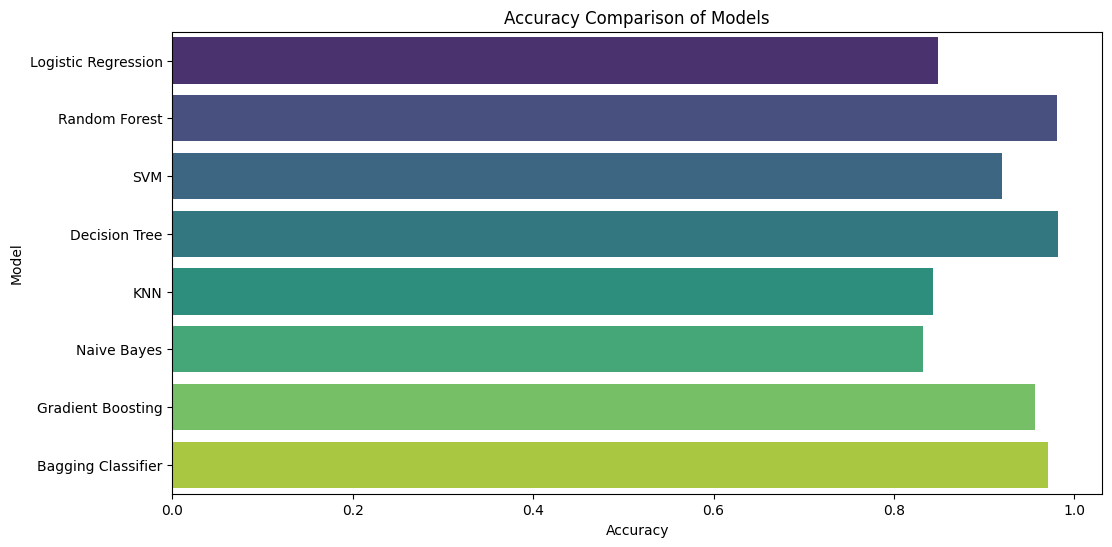

In [ ]:
# Plot the model accuarcy results
plt.figure(figsize=(12,6))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")
plt.title("Accuracy Comparison of Models")
plt.show()

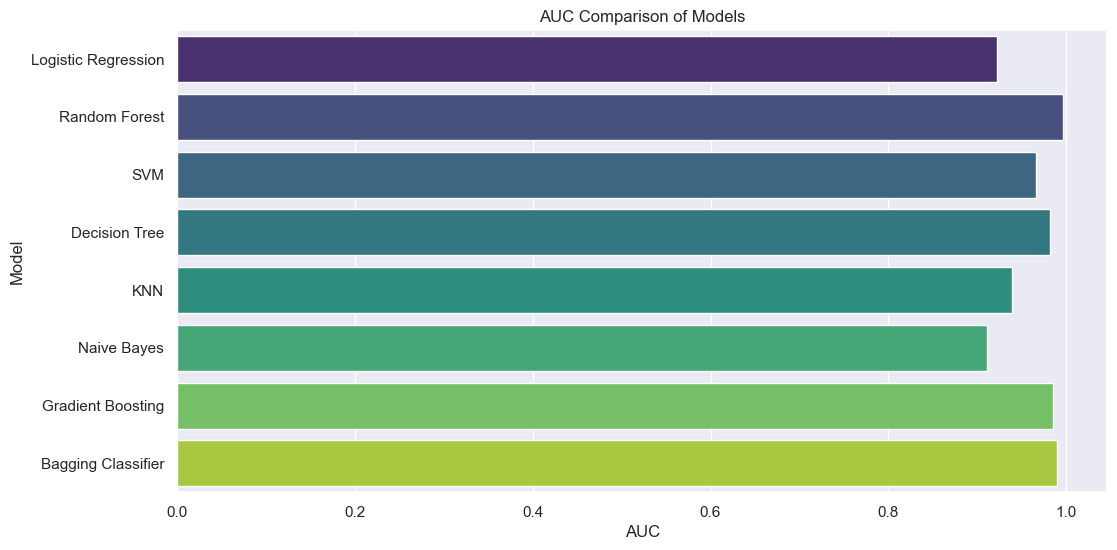

In [ ]:
# Plot the model accuarcy results
plt.figure(figsize=(12,6))
sns.barplot(x="AUC", y="Model", data=results_df, palette="viridis")
plt.title("AUC Comparison of Models")
plt.show()

In [ ]:
# Plot the model accuarcy results
#plt.figure(figsize=(12,6))
#sns.barplot(x="Recall", y="Model", data=results_df, palette="viridis")
#plt.title("Recall Comparison of Models")
#plt.show()

In [ ]:
# Plot the model accuarcy results
#plt.figure(figsize=(12,6))
#sns.barplot(x="Precision", y="Model", data=results_df, palette="viridis")
#plt.title("Precision Comparison of Models")
#plt.show()

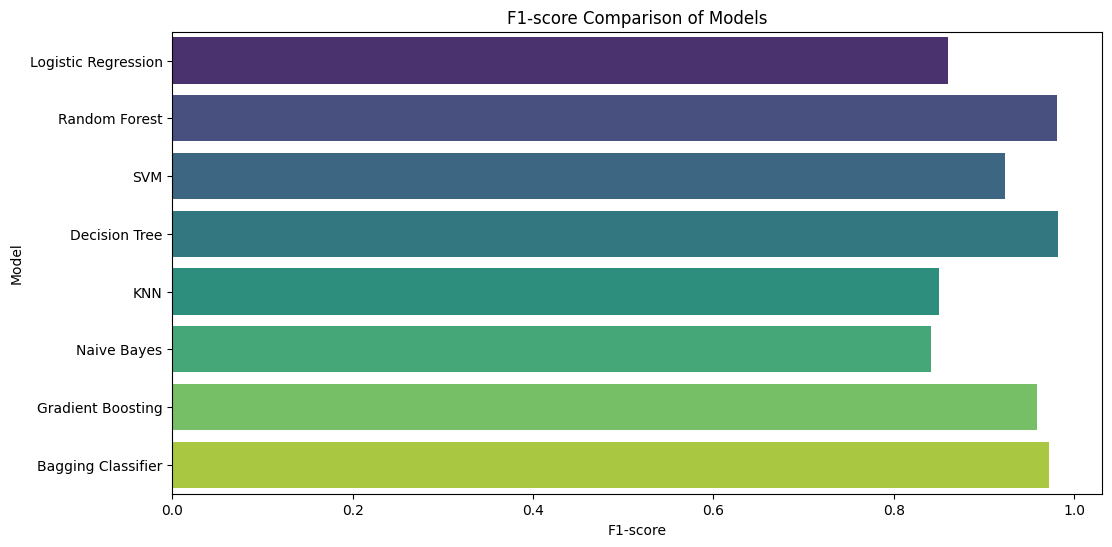

In [ ]:
# Plot the model accuarcy results
plt.figure(figsize=(12,6))
sns.barplot(x="F1-score", y="Model", data=results_df, palette="viridis")
plt.title("F1-score Comparison of Models")
plt.show()

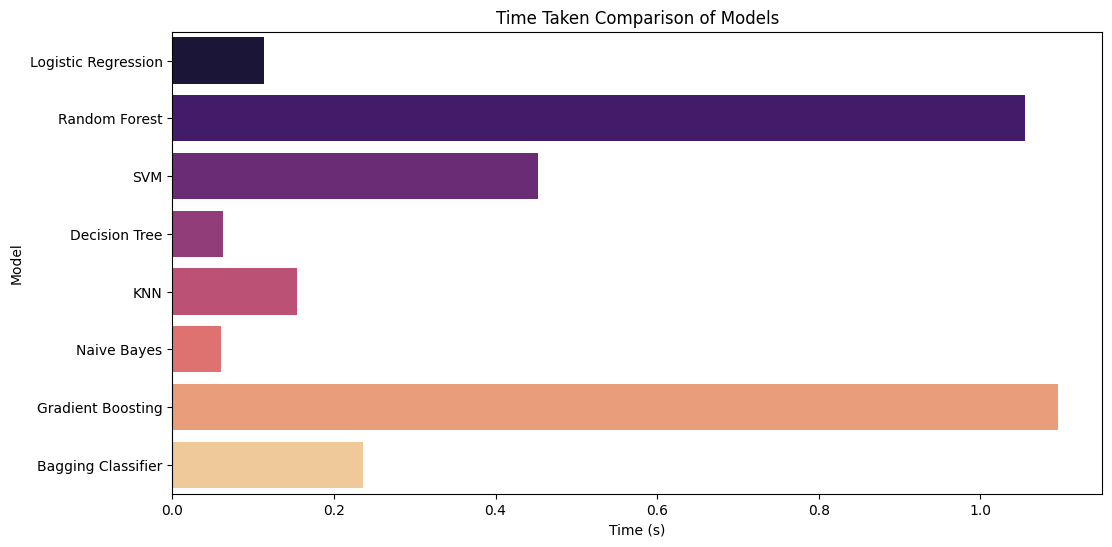

In [ ]:
# Plot the time comparison
plt.figure(figsize=(12, 6))
sns.barplot(x="Time (s)", y="Model", data=results_df, palette="magma")
plt.title("Time Taken Comparison of Models")
plt.show()

<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

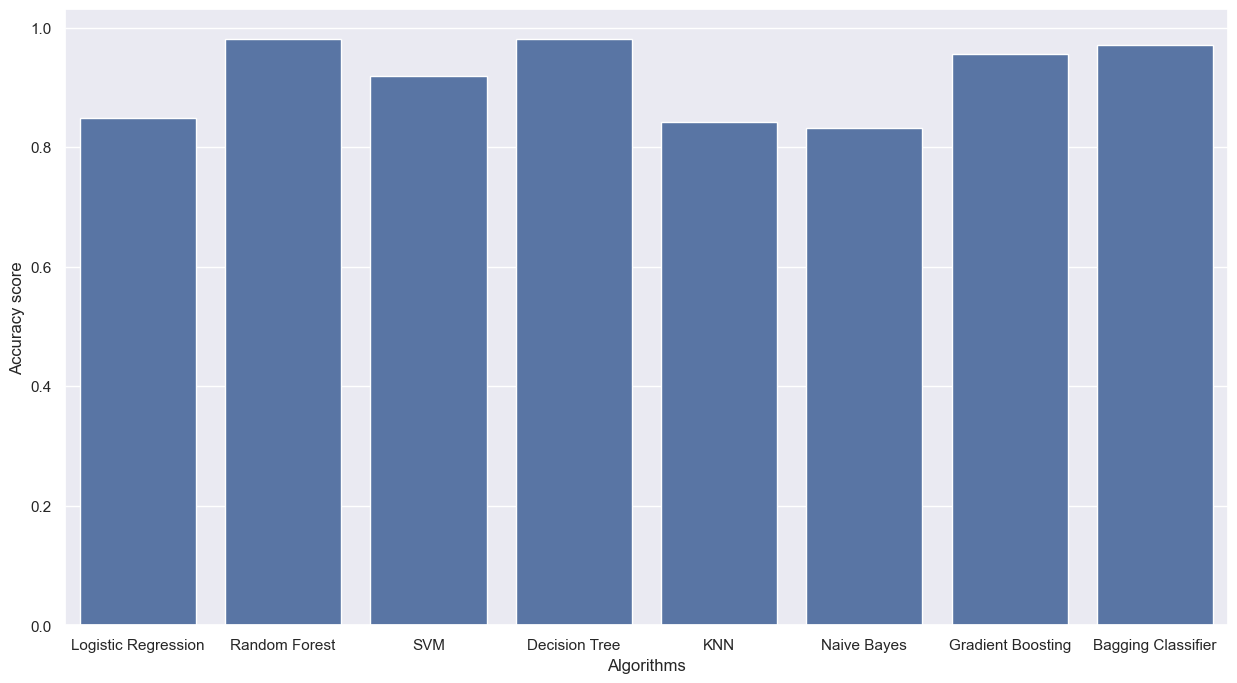

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=results_df['Model'], y=results_df['Accuracy'])

Random Forest gives better results compared to other algorithms